In [26]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [31]:
# 读取数据集
fileName = "raw_price_train/2_r_price_train.csv"
data = pd.read_csv(fileName)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012/9/4,248.270004,251.000000,244.660004,247.880005,247.880005,3950800.0
1,2012/9/5,247.610001,248.610001,245.300003,246.220001,246.220001,2652600.0
2,2012/9/6,248.229996,252.699997,247.199997,251.380005,251.380005,5361400.0
3,2012/9/7,253.850006,259.420013,253.520004,259.140015,259.140015,5029500.0
4,2012/9/10,259.000000,260.000000,256.820007,257.089996,257.089996,2567200.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         829 non-null object
Open         829 non-null float64
High         829 non-null float64
Low          829 non-null float64
Close        829 non-null float64
Adj Close    829 non-null float64
Volume       829 non-null float64
dtypes: float64(6), object(1)
memory usage: 68.9+ KB


In [34]:
data = data.dropna()

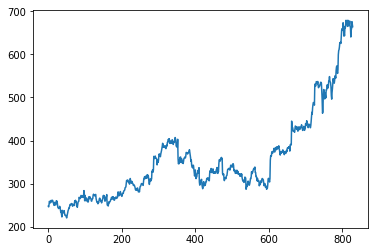

In [35]:
plt.plot(data["Adj Close"].tolist())

In [36]:
# 归一化
min_data = np.min(data["Adj Close"].values)
max_data = np.max(data["Adj Close"].values)
data["Adj Close"] = (data["Adj Close"]-min_data)/(max_data-min_data)

# 预处理

In [37]:
def preprocess(data,m):
    '''
    data: the dataframe of stock price
    m: the length of sequence
    '''
    adj_close = data["Adj Close"].tolist()
    #
    res_X = []
    res_y = []
    # 剔除前4个元素
    for i in range(4,len(adj_close)-m):
        res_X.append(adj_close[i:i+m])
        res_y.append(adj_close[i+m])
    return res_X,res_y

In [38]:
X,y = preprocess(data,1)
X = np.array(X)
y = np.array(y)


In [39]:
print(X.shape)
print(y.shape)

(824, 1)
(824,)


1  degree finished
2  degree finished
3  degree finished
4  degree finished


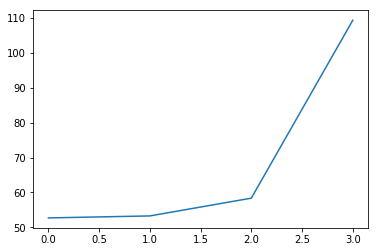

In [47]:
# 探究无特征工程下 m对mse影响
degree = range(1,5)
model_kfold = LinearRegression()
#10折交叉验证
kf = KFold(n_splits=10)
result = []
for item in degree:
    qf = PolynomialFeatures(degree = item)
    X_transform = qf.fit_transform(X)
    mse = []
    for i,j in kf.split(X_transform,y):
        model_kfold.fit([X_transform[item] for item in i],[y[item] for item in i])
        y_est = model_kfold.predict([X_transform[item] for item in j])
        y_est = y_est*(max_data-min_data)+min_data
        y_test =np.array([y[item] for item in j])*(max_data-min_data)+min_data
        mse.append(np.power(y_test-y_est,2).mean())
    
    result.append(np.array(mse).mean())
    print(item," degree finished")
plt.plot(result)

In [48]:
qf = PolynomialFeatures(degree = 1)
X_transform = qf.fit_transform(X)
kf = KFold(n_splits=10)
mse = []
model_kfold_sta = LinearRegression()
for i,j in kf.split(X,y):
    model_kfold_sta.fit([X_transform[item] for item in i],[y[item] for item in i])
    y_est = model_kfold_sta.predict([X_transform[item] for item in j])
    y_est = y_est*(max_data-min_data)+min_data
    y_test =np.array([y[item] for item in j])*(max_data-min_data)+min_data
    mse.append(np.power(y_test-y_est,2).mean())
print(np.mean(mse))

52.68643882762076


# 可视化

In [74]:
fileName = "raw_price_train/2_r_price_train.csv"
data = pd.read_csv(fileName)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012/9/4,248.270004,251.000000,244.660004,247.880005,247.880005,3950800.0
1,2012/9/5,247.610001,248.610001,245.300003,246.220001,246.220001,2652600.0
2,2012/9/6,248.229996,252.699997,247.199997,251.380005,251.380005,5361400.0
3,2012/9/7,253.850006,259.420013,253.520004,259.140015,259.140015,5029500.0
4,2012/9/10,259.000000,260.000000,256.820007,257.089996,257.089996,2567200.0


In [75]:
data = data.dropna()

In [76]:
min_data = np.min(data["Adj Close"].values)
max_data = np.max(data["Adj Close"].values)
data["Adj Close"] = (data["Adj Close"]-min_data)/(max_data-min_data)

In [77]:
X,y = preprocess(data,1)
X = np.array(X)
y = np.array(y)

In [78]:
X

array([[0.07959253],
       [0.07649521],
       [0.07640797],
       [0.08646334],
       [0.08870999],
       [0.08157744],
       [0.08321335],
       [0.0896043 ],
       [0.08770665],
       [0.0804214 ],
       [0.07459756],
       [0.06949353],
       [0.06340791],
       [0.07850192],
       [0.07355059],
       [0.06851195],
       [0.06543646],
       [0.07704051],
       [0.08696505],
       [0.08268988],
       [0.08388953],
       [0.0662217 ],
       [0.05319984],
       [0.0515203 ],
       [0.04746324],
       [0.05143303],
       [0.05090956],
       [0.05865288],
       [0.05289447],
       [0.04231557],
       [0.0287484 ],
       [0.02990445],
       [0.01720979],
       [0.0050604 ],
       [0.03847664],
       [0.02680712],
       [0.02517121],
       [0.02578195],
       [0.02994808],
       [0.0369934 ],
       [0.02499671],
       [0.0147232 ],
       [0.01245472],
       [0.01280372],
       [0.01308729],
       [0.00512584],
       [0.        ],
       [0.010

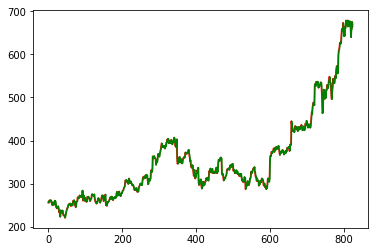

In [85]:
xx = qf.fit_transform(X)
yy = model_kfold_sta.predict(xx)

yy = yy*(max_data-min_data)+min_data
y = y*(max_data-min_data)+min_data
plt.plot(y,c = "r")
plt.plot(yy,c='g')

AttributeError: 'numpy.ndarray' object has no attribute 'describe'